In [27]:
import pandas as pd 
import scipy.cluster.hierarchy as sch 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
pd.set_option('display.max_rows', None)

In [29]:
df = pd.read_csv('anime.csv')
df

,Rank,Title,Score
0,1,Fullmetal Alchemist: BrotherhoodTV (64 eps)Apr...,9.10
1,2,"Steins;GateTV (24 eps)Apr 2011 - Sep 20112,473...",9.07
2,3,Bleach: Sennen Kessen-henTV (13 eps)Oct 2022 -...,9.06
3,4,"Gintama°TV (51 eps)Apr 2015 - Mar 2016605,113 ...",9.06
4,5,Shingeki no Kyojin Season 3 Part 2TV (10 eps)A...,9.05
5,6,"Gintama'TV (51 eps)Apr 2011 - Mar 2012534,105 ...",9.04
6,7,Gintama: The FinalMovie (1 eps)Jan 2021 - Jan ...,9.04
7,8,Hunter x Hunter (2011)TV (148 eps)Oct 2011 - S...,9.04
8,9,Kaguya-sama wa Kokurasetai: Ultra RomanticTV (...,9.04
9,10,Gintama': EnchousenTV (13 eps)Oct 2012 - Mar 2...,9.03


In [4]:
df = df.drop(['Title'], axis=1)

In [5]:
df.head()

,Rank,Score
0,1,9.10
1,2,9.07
2,3,9.06
3,4,9.06
4,5,9.05


In [6]:
df.isnull().sum()

Rank     0
Score    0
dtype: int64

[Text(0.5, 1.0, 'Anime Plotting'), Text(0.5, 0, 'Rank'), Text(0, 0.5, 'Score')]

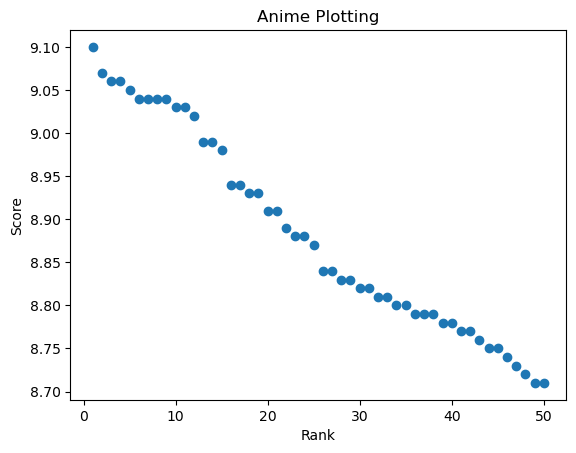

In [10]:
fig, ax = plt.subplots()
ax.scatter(df['Rank'], df['Score'])
ax.set(title="Anime Plotting", xlabel="Rank", ylabel="Score")

In [13]:
X = df[:].values
X

array([[ 1.  ,  9.1 ],
       [ 2.  ,  9.07],
       [ 3.  ,  9.06],
       [ 4.  ,  9.06],
       [ 5.  ,  9.05],
       [ 6.  ,  9.04],
       [ 7.  ,  9.04],
       [ 8.  ,  9.04],
       [ 9.  ,  9.04],
       [10.  ,  9.03],
       [11.  ,  9.03],
       [12.  ,  9.02],
       [13.  ,  8.99],
       [14.  ,  8.99],
       [15.  ,  8.98],
       [16.  ,  8.94],
       [17.  ,  8.94],
       [18.  ,  8.93],
       [19.  ,  8.93],
       [20.  ,  8.91],
       [21.  ,  8.91],
       [22.  ,  8.89],
       [23.  ,  8.88],
       [24.  ,  8.88],
       [25.  ,  8.87],
       [26.  ,  8.84],
       [27.  ,  8.84],
       [28.  ,  8.83],
       [29.  ,  8.83],
       [30.  ,  8.82],
       [31.  ,  8.82],
       [32.  ,  8.81],
       [33.  ,  8.81],
       [34.  ,  8.8 ],
       [35.  ,  8.8 ],
       [36.  ,  8.79],
       [37.  ,  8.79],
       [38.  ,  8.79],
       [39.  ,  8.78],
       [40.  ,  8.78],
       [41.  ,  8.77],
       [42.  ,  8.77],
       [43.  ,  8.76],
       [44.

Text(0.5, 1.0, 'Anime Plotting')

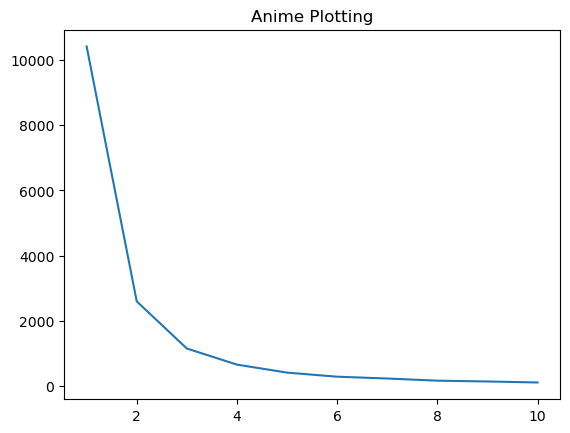

In [17]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Anime Plotting")

In [18]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

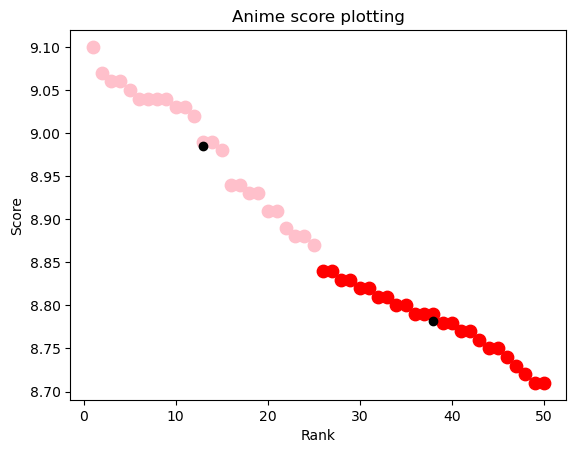

In [25]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=80, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=80, c='pink', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], c='black', label='centroids')
plt.title('Anime score plotting')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.show();


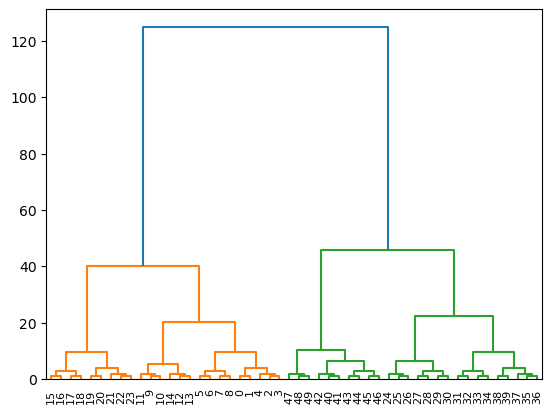

In [26]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

### Hence you can say the anime rating started to go downhill from the violet evergarden movie 